#### Problem Statement


An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

Data
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

#### Goals of the Case Study

There are quite a few goals for this case study:

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.
    

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing necessary libraries

#Data Analysis & Data wrangling
import numpy as np
import pandas as pd
from collections import Counter

#Visualization
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline

# Plot Style
sns.set_context("paper")
style.use('fivethirtyeight')

# Machine Learning Libraries

#Sci-kit learn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm



In [4]:
#Import dataset
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Check the shape of the data
leads.shape

(9240, 37)

In [6]:
# Check the datatypes and count of null entries
leads.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

It can be observed that there are a few null values in the columns.

### Data analysis and cleaning

Many of the categorical variables have a level called 'Select' because the customer did not select any option, hence that should be handled.

In [7]:
# Replace all values that have "Select' with Null
leads = leads.replace('Select', np.nan)

In [8]:
#Count columns with fewer than 9240 observations 
col_nulls = [leads[c].isna().max() for c in leads.columns]
sum(col_nulls)

17

There are 17 columns which have null values, let's take a look at them


In [9]:
#Columnwise null values analysis 
null_cols = pd.DataFrame(round((leads.isnull().sum())*100/leads.shape[0],2)).reset_index()
null_cols.columns = ['Column Name', 'Null Values Percentage']
null_value = pd.DataFrame(leads.isnull().sum()).reset_index()
null_value.columns = ['Column Name', 'Null Values']
null_lead = pd.merge(null_value, null_cols, on='Column Name')
null_lead.sort_values("Null Values", ascending = False)



,Column Name,Null Values,Null Values Percentage
13,How did you hear about X Education,7250,78.46
28,Lead Profile,6855,74.19
25,Lead Quality,4767,51.59
33,Asymmetrique Profile Score,4218,45.65
32,Asymmetrique Activity Score,4218,45.65
30,Asymmetrique Activity Index,4218,45.65
31,Asymmetrique Profile Index,4218,45.65
29,City,3669,39.71
12,Specialization,3380,36.58
24,Tags,3353,36.29


#### Dropping columns 

In [10]:
# Dropping columns that have more than 45% null values.
# Also dropping columns that will not be useful in the analysis 
# Dropping columns that have their data created after lead is successful (Lead Quality, Tags, etc)
missing_cols = [col for col in leads.columns if (leads[col].isna().sum()/leads.shape[0]*100) > 45]
leads.drop(missing_cols, axis = 1, inplace = True)

In [11]:
cols_to_drop = ['Prospect ID', 'Lead Number','Last Notable Activity','Tags']
leads.drop(cols_to_drop, 1, inplace = True)

In [12]:
len(leads.columns)

26

In [13]:
# Checking for null values in rows
# Number of rows with null values equalling more than 50%
len(leads[leads.isnull().sum(axis=1)/leads.shape[1]>0.5])

0

In [14]:
# Checking for duplicate values
leads.duplicated().any()

True

There are no rows with more than 50% of null values, and there are no duplicates in the data

####  Segregating data into Categorical and Numerical Values 

In [15]:
categorical = leads.select_dtypes(exclude =["number"]).columns.values
numerical = leads.select_dtypes(include =["number"]).columns.values
print("CATEGORICAL FEATURES : \n {} \n\n".format(categorical))
print("NUMERICAL FEATURES : \n {} ".format(numerical))

CATEGORICAL FEATURES : 
 ['Lead Origin' 'Lead Source' 'Do Not Email' 'Do Not Call' 'Last Activity'
 'Country' 'Specialization' 'What is your current occupation'
 'What matters most to you in choosing a course' 'Search' 'Magazine'
 'Newspaper Article' 'X Education Forums' 'Newspaper'
 'Digital Advertisement' 'Through Recommendations'
 'Receive More Updates About Our Courses'
 'Update me on Supply Chain Content' 'Get updates on DM Content' 'City'
 'I agree to pay the amount through cheque'
 'A free copy of Mastering The Interview'] 


NUMERICAL FEATURES : 
 ['Converted' 'TotalVisits' 'Total Time Spent on Website'
 'Page Views Per Visit'] 


In [16]:
# Handling null values in categorical variables
# Checking unique values and null values for the categorical columns
def Cat_info(df, categorical_column):
    df_result = pd.DataFrame(columns=["columns","values","unique_values","null_values","null_percent"])
    
    df_temp=pd.DataFrame()
    for value in categorical_column:
        df_temp["columns"] = [value]
        df_temp["values"] = [df[value].unique()]
        df_temp["unique_values"] = df[value].nunique()
        df_temp["null_values"] = df[value].isna().sum()
        df_temp["null_percent"] = (df[value].isna().sum()/len(df)*100).round(1)
        df_result = df_result.append(df_temp)
    
    df_result.sort_values("null_values", ascending =False, inplace=True)
    df_result.set_index("columns", inplace=True)
    return df_result

df_cat = Cat_info(leads, categorical)
df_cat



,values,unique_values,null_values,null_percent
columns,,,,
City,"[nan, Mumbai, Thane & Outskirts, Other Metro C...",6,3669,39.7
Specialization,"[nan, Business Administration, Media and Adver...",18,3380,36.6
What matters most to you in choosing a course,"[Better Career Prospects, nan, Flexibility & C...",3,2709,29.3
What is your current occupation,"[Unemployed, Student, nan, Working Professiona...",6,2690,29.1
Country,"[nan, India, Russia, Kuwait, Oman, United Arab...",38,2461,26.6
Last Activity,"[Page Visited on Website, Email Opened, Unreac...",17,103,1.1
Lead Source,"[Olark Chat, Organic Search, Direct Traffic, G...",21,36,0.4
Lead Origin,"[API, Landing Page Submission, Lead Add Form, ...",5,0,0.0
Digital Advertisement,"[No, Yes]",2,0,0.0


- Columns that have only 1 category (I agree to pay the amount through cheque, Get updates on DM Content, etc) will be dropped as they will not     
  contribute to the analysis
- Columns that have "NaN" should also be handled

In [17]:
# Adding the columns to col_to_drop where only 1 category value is present
cols_to_drop = df_cat[df_cat['unique_values']==1].index.values.tolist() 
cols_to_drop

['I agree to pay the amount through cheque',
 'Get updates on DM Content',
 'Update me on Supply Chain Content',
 'Receive More Updates About Our Courses',
 'Magazine']

In [18]:
leads.drop(cols_to_drop, 1, inplace = True)
len(leads.columns)

21

Addressing individual categorical columns to handle null values

In [19]:
leads['City'].value_counts(normalize=True)*100

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64

Dropping city as the data is skewed, and there are almost 40% null values, and since X is an online teaching platform, the location of the customer will not matter much, since the course will be online

In [20]:
leads.drop("City",axis=1, inplace = True)
len(leads.columns)

20

In [21]:
leads['Specialization'].value_counts(normalize = True)*100

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64

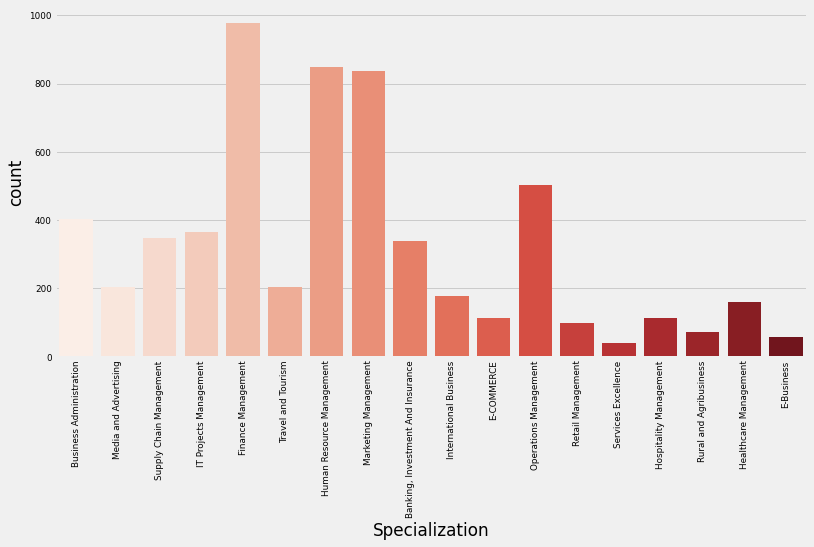

In [22]:
plt.figure(figsize=(12,6))
ax = sns.countplot(leads['Specialization'],palette = 'Reds')
plt.xticks(rotation = 90)
plt.show()

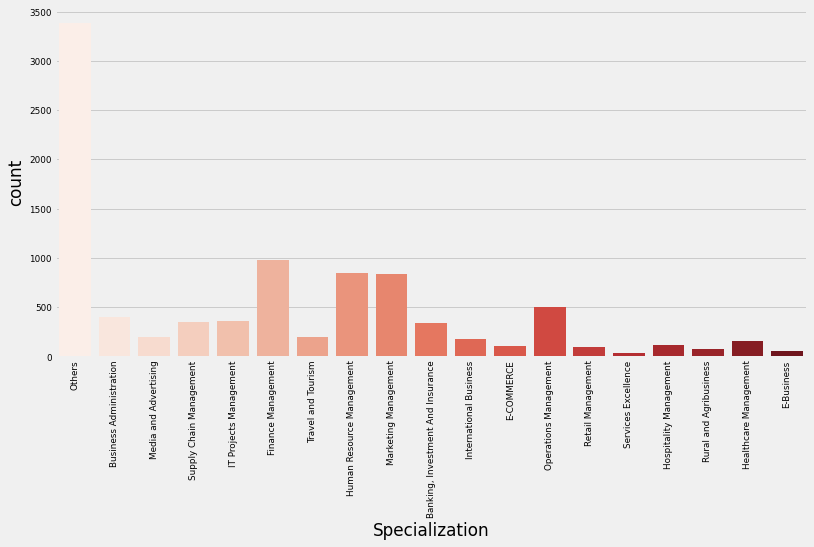

In [23]:
# After imputing the 36.6% null values as 'Others' since the customer can be a student or umemployed 
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Others')
plt.figure(figsize=(12,6))
ax = sns.countplot(leads['Specialization'],palette = 'Reds')
plt.xticks(rotation = 90)
plt.show()

In [24]:
leads['What matters most to you in choosing a course'].value_counts(normalize = True)*100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

Data is tremendously skewed, hence the column will be dropped

In [25]:
leads.drop('What matters most to you in choosing a course', axis = 1, inplace=True)

In [26]:
leads['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

Almost 30% values are null, hence it will be imputed as 'Unknown'

In [27]:
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Unknown')
leads['What is your current occupation'].value_counts(normalize = True)*100

Unemployed              60.606061
Unknown                 29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [28]:
leads['Country'].value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vietnam   

The data is extremely skewed, since 95.7% customers are from India, hence it will be dropped

In [29]:
leads.drop('Country', axis = 1, inplace = True)

In [30]:
leads['Last Activity'].value_counts(normalize = True)*100

Email Opened                    37.616285
SMS Sent                        30.042684
Olark Chat Conversation         10.649010
Page Visited on Website          7.004487
Converted to Lead                4.684251
Email Bounced                    3.567911
Email Link Clicked               2.922185
Form Submitted on Website        1.269563
Unreachable                      1.017840
Unsubscribed                     0.667615
Had a Phone Conversation         0.328335
Approached upfront               0.098501
View in browser link Clicked     0.065667
Email Received                   0.021889
Email Marked Spam                0.021889
Visited Booth in Tradeshow       0.010945
Resubscribed to emails           0.010945
Name: Last Activity, dtype: float64

The null values of Last activity will be replaced by Email Opened since it is the highest

In [31]:
leads['Last Activity'] = leads['Last Activity'].replace(np.nan, 'Email Opened')

In [32]:
leads['Lead Source'].value_counts(normalize = True)*100

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Social Media          0.021730
Live Chat             0.021730
youtubechannel        0.010865
testone               0.010865
Pay per Click Ads     0.010865
welearnblog_Home      0.010865
WeLearn               0.010865
blog                  0.010865
NC_EDM                0.010865
Name: Lead Source, dtype: float64

- The null values will be imputed by replacing them with "Google". 
- Also, the category 'google' is the same as 'Google' hence that will be handled as well

In [33]:
leads['Lead Source'] = leads['Lead Source'].replace(np.nan, 'Google')
leads['Lead Source'] = leads['Lead Source'].replace(['google'], 'Google')

In [34]:
# Handling all numerical null values
def Num_info(df, numeric_column):
    df_result = pd.DataFrame(columns=["columns","null_values","null_percent"])
    
    df_temp=pd.DataFrame()
    for value in numeric_column:
        df_temp["columns"] = [value]
        df_temp["null_values"] = df[value].isna().sum()
        df_temp["null_percent"] = (df[value].isna().sum()/len(df)*100).round(1)
        df_result = df_result.append(df_temp)
    
    df_result.sort_values("null_values", ascending =False, inplace=True)
    df_result.set_index("columns", inplace=True)
    return df_result

df_num = Num_info(leads,numerical)
df_num



,null_values,null_percent
columns,,
TotalVisits,137,1.5
Page Views Per Visit,137,1.5
Converted,0,0.0
Total Time Spent on Website,0,0.0


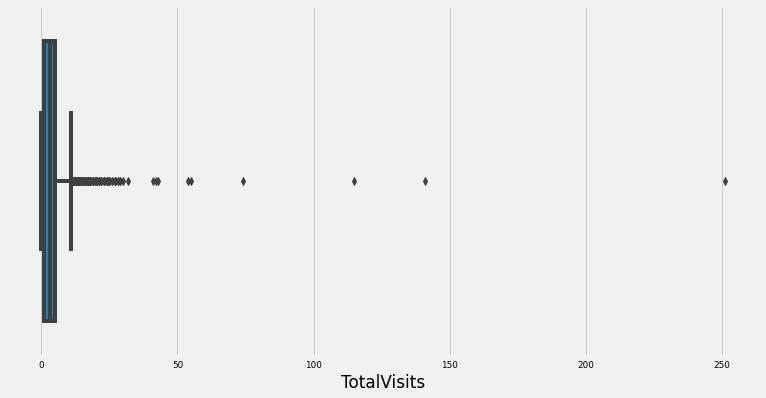

In [35]:
plt.figure(figsize = (12,6))
sns.boxplot(leads['TotalVisits'])
plt.show()

As seen there are outliers in TotalVisits, and hence they will be replaced by the median 

In [36]:
leads['TotalVisits'].fillna(leads['TotalVisits'].median(), inplace=True)
leads['TotalVisits'].isnull().sum()

0

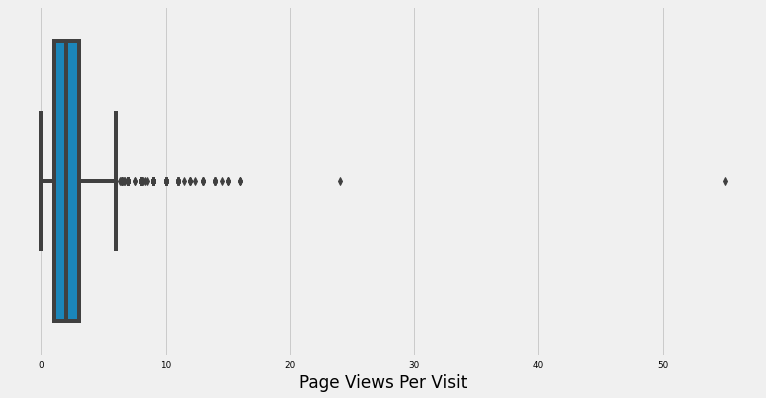

In [37]:
plt.figure(figsize = (12,6))
sns.boxplot(leads['Page Views Per Visit'])
plt.show()

As seen there are outliers in Page Views Per Visit, and hence they will be replaced by the median 

In [38]:
leads['Page Views Per Visit'].fillna(leads['Page Views Per Visit'].median(), inplace=True)
leads['Page Views Per Visit'].isnull().sum()

0

### Exploratory Data Analysis


In [39]:
converted = leads['Converted'].value_counts().rename_axis('unique_values').to_frame('counts')
converted

,counts
unique_values,
0,5679
1,3561


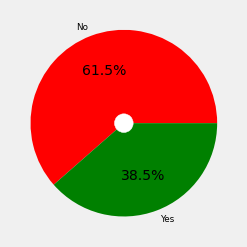

In [40]:
circle=plt.Circle( (0,0), 0.1, color='white')
plt.pie(converted.counts, labels = ['No','Yes'],colors = ['red','green'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(circle)
plt.show()

It can be seen that there is no data imbalance

#### Univariate Analysis 


In [41]:
# function for plotting repetitive countplots in univariate categorical analysis for the leads dataset
# This function will create two subplots: 
# 1. Count plot of categorical column w.r.t Converted; 
# 2. Percentage of defaulters within column

def univariate_categorical(feature,ylog=False,label_rotation=False,horizontal_layout=True):
    temp = leads[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Count': temp.values})

    # Calculate the percentage of converted=1 per category value
    cat_perc = leads[[feature, 'Converted']].groupby([feature],as_index=False).mean()
    cat_perc["Converted"] = cat_perc["Converted"]*100
    cat_perc.sort_values(by='Converted', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,24))
        
    # 1. Subplot 1: Count plot of categorical column
    # sns.set_palette("Set2")
    s = sns.countplot(ax=ax1, 
                    x = feature, 
                    data=leads,
                    hue ="Converted",
                    order=cat_perc[feature],
                    palette=['r','g'])
    
    # Define common styling
    ax1.set_title(feature, fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'}) 
    ax1.legend(['Not converted','Coverted'])
    
    # If the plot is not readable, use the log scale.
    if ylog:
        ax1.set_yscale('log')
        ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})   
    
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    # 2. Subplot 2: Percentage of defaulters within the categorical column
    s = sns.barplot(ax=ax2, 
                    x = feature, 
                    y='Converted', 
                    order=cat_perc[feature], 
                    data=cat_perc,
                    palette='Set2')
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of Converted leads [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(feature + " Converted %", fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 

    plt.show();


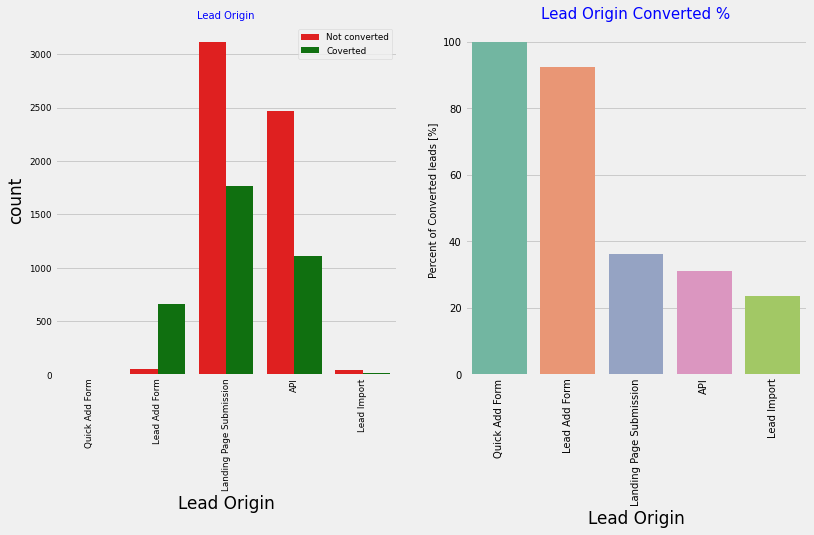

In [42]:
univariate_categorical("Lead Origin",label_rotation=True)

Insight:
- Majority of the leads originate from the landing page submission, but only around 38% of those are converted.
- That is followed by the API which has only 32% on it's leads converted
- Leads that originate from Quick Add Form have a 100% conversion rate, but it had only one lead.
- Similarly, leads from Lead Add Form have a very high conversion rate, but they also have very less leads, around 600.

**To have better conversion rates, leads who originate from API and Landing Page Submissions should be focused on.**

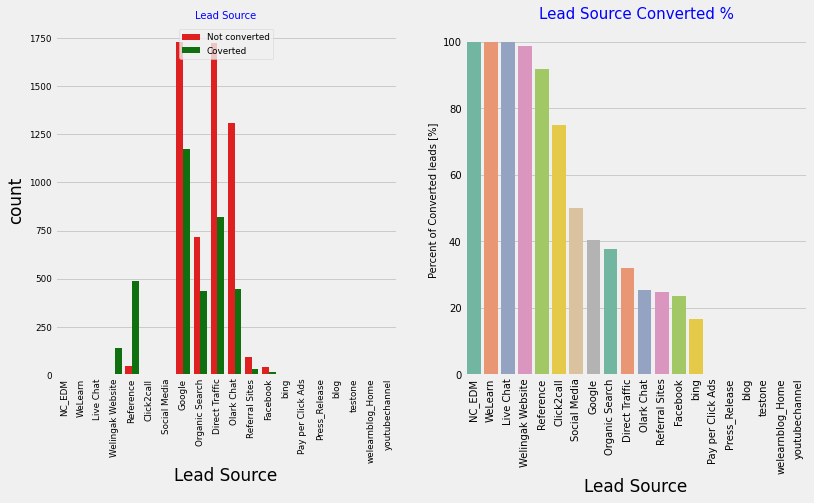

In [43]:
univariate_categorical("Lead Source",label_rotation=True)

Insight:
- Most of the leads came from Google, and had a conversion rate of 40%
- NC_EDM, WeLearn and Live Chat look like they have 100% conversion rate, but they have very less leads.
- Referrals have more than 500 leads, and have a very high conversion rate. 
- While Welingak Website has a small amount of leads, that is close to 100, they have almost a 100% conversion rate.

**To have better conversion rates, existing customers should be motivated and incentivized to bring in more leads**

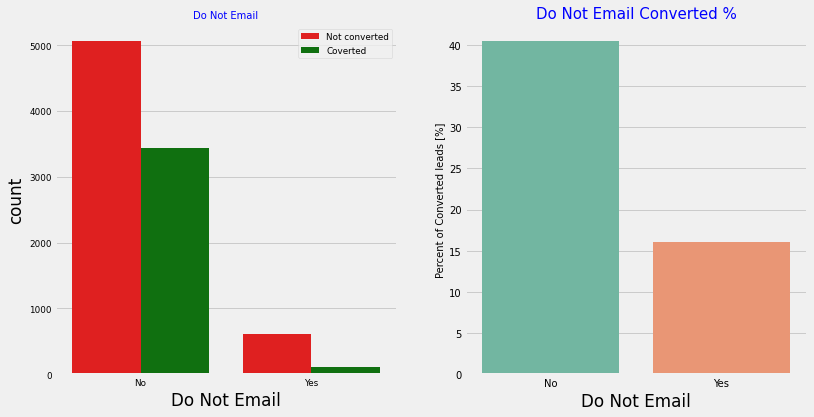

In [44]:
univariate_categorical("Do Not Email")

Insight:
- Majority of the customers do not mind receiving emails
- Customers who do not opt to get an email have a low conversion rate (close to 15%)

**Customers who do not opt for emails, should not be focused on as the resources could be wasted on them**

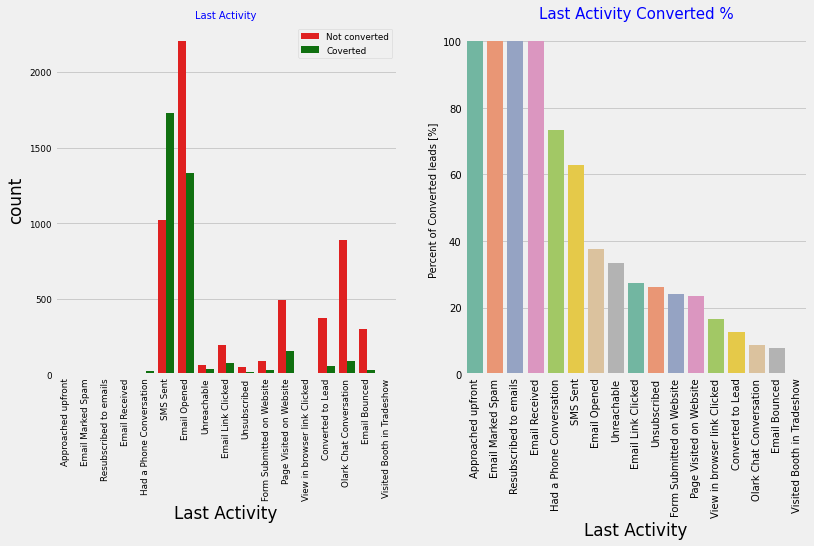

In [45]:
univariate_categorical("Last Activity",label_rotation=True)

Since this there are too many categories, merging small categories into a single category 

In [46]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
leads['Last Activity'] = leads['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other Activity')

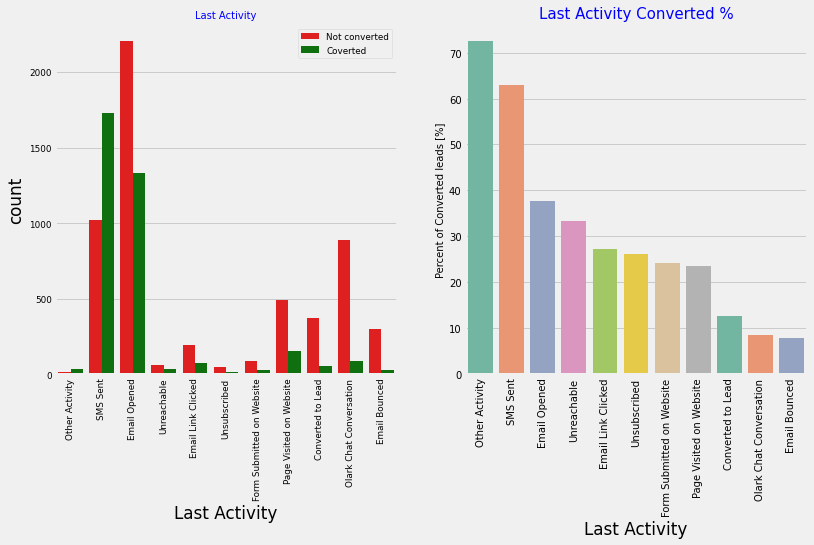

In [47]:
univariate_categorical("Last Activity",label_rotation=True)

Insight:
- Most of the leads came from customers who's last activity was opening the email, and had a conversion rate close to 40%
- While Other Activities have a very high conversion rate, they are very few in leads
- Customers who's last activity was opening the SMS have a conversion rate of more than 60%

**To have better conversion rates, more emails and SMS's could be sent**

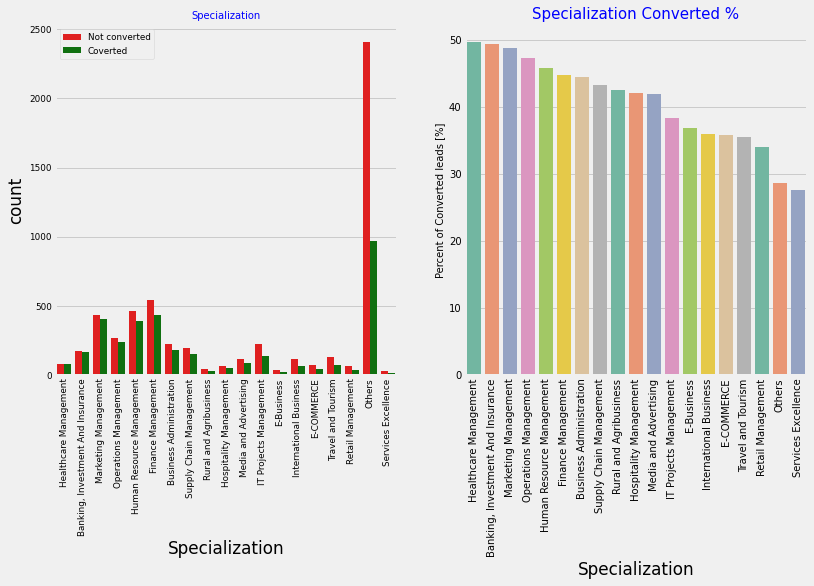

In [48]:
univariate_categorical("Specialization",label_rotation=True)

Insight:
- Since the specialization of most leads was not an option, more research can be done on that front.

**Specilization does not seem to provide any useful insight**

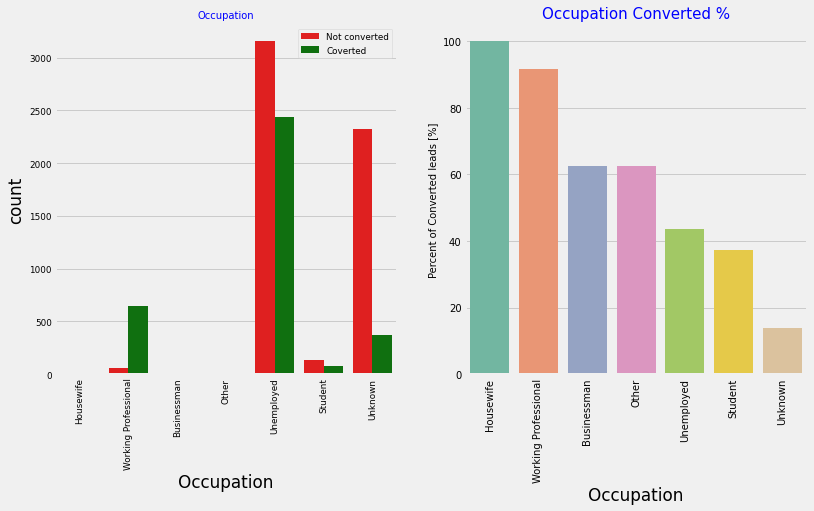

In [49]:
# Renaming a column for readability 
leads.rename(columns={'What is your current occupation': 'Occupation'},inplace = True)
univariate_categorical("Occupation",label_rotation=True)

Insight:
- Working professionals, Businessmen and the other categories have a high conversion rate 
- Anyone who's Occupation is not mentioned or null has a very low conversion rate

**To save resources, leads with no occupation mentioned should be avoided**

In [50]:
# Renaming columns for better readability 
leads.rename(columns={'A free copy of Mastering The Interview': 'Free Copy','Through Recommendations': 'Recommendation'},inplace = True)

Creating a function to plot all binary catagorical variables

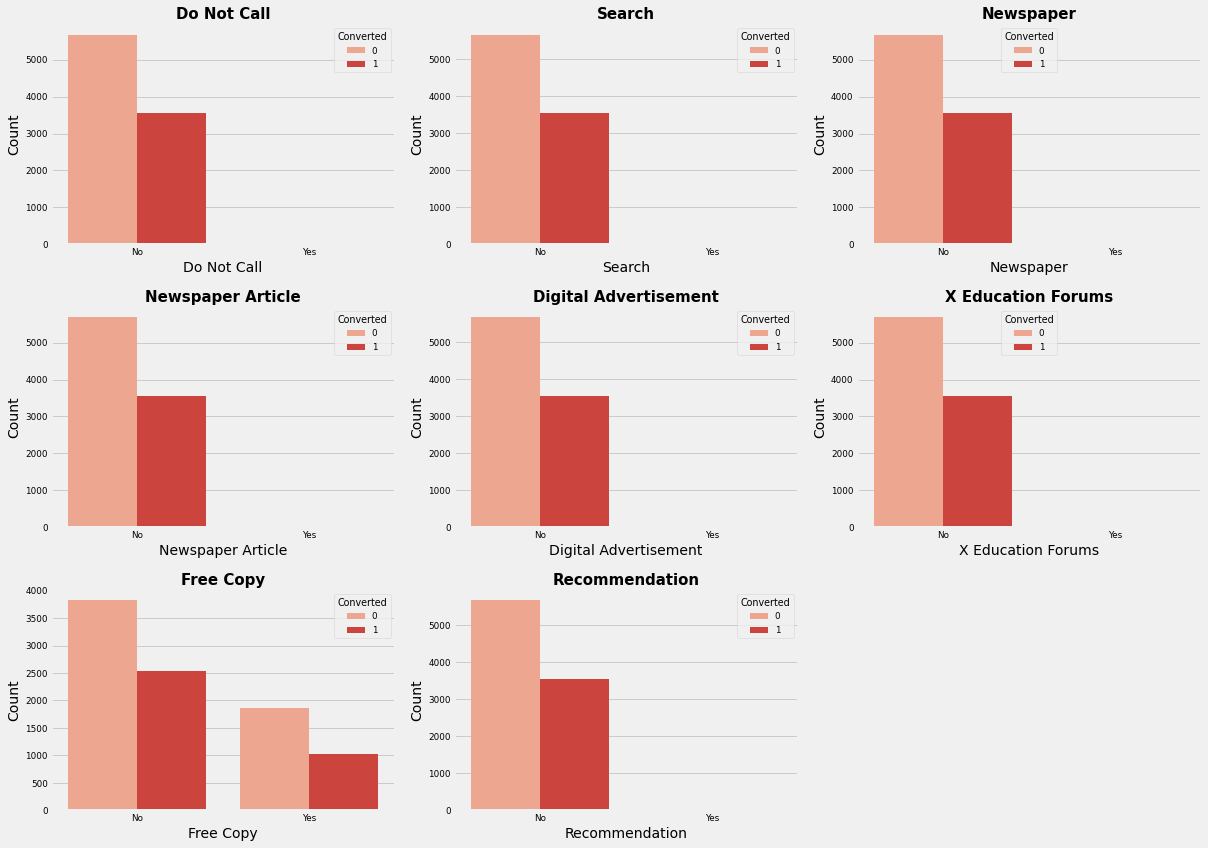

In [51]:
#visualizing binary catagorical variables
binary_cat_cols=['Do Not Call','Search', 'Newspaper', 'Newspaper Article', 'Digital Advertisement', 'X Education Forums', 'Free Copy','Recommendation']
plt.figure(figsize = [17, 12])
for i in range(len(binary_cat_cols)):
    plt.subplot(3, 3, i+1)
    x, y = binary_cat_cols[i], 'Converted'
    ax = sns.countplot(leads[x], hue = leads[y], palette = 'Reds')
    ax.set_title('{}'.format(x), fontsize = 15, fontweight = 'bold', pad = 5)
    ax.set_xlabel(x, fontsize = 14)
    ax.set_ylabel('Count', fontsize = 14)
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth(1.5)  
plt.tight_layout()

Insight:
- All the binary categorical values are skewed, except Free Copy

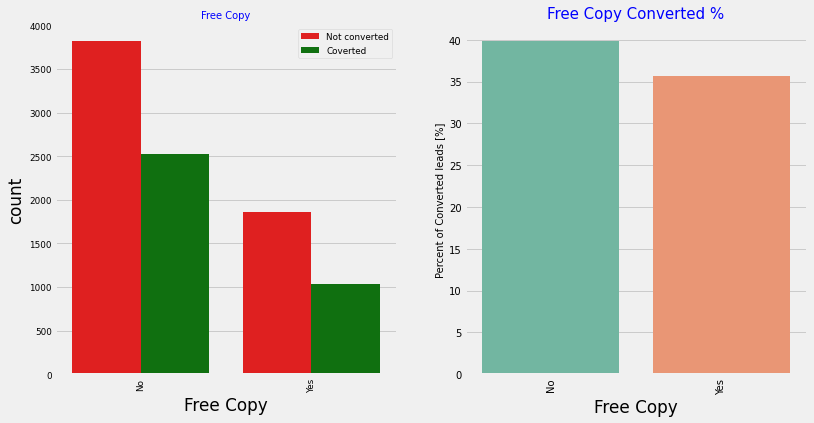

In [52]:
univariate_categorical("Free Copy",label_rotation=True)

Insight:
- All the binary categorical values are skewed, except Free Copy.
- However the conversion rate of Free Copy is the same for those who received it and those who did not, hence it does not add much value



In [53]:
# Dropping all binary categorical columns
leads.drop(binary_cat_cols,axis = 1, inplace = True)

In [54]:
len(leads.columns)

10

In [55]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'Occupation'],
      dtype='object')

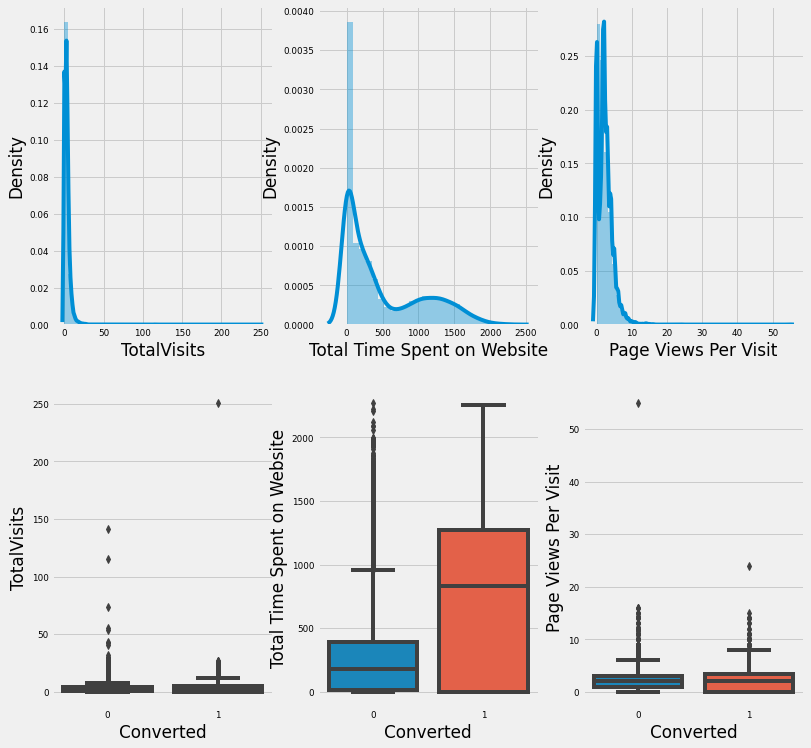

In [56]:
numerical = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
plt.figure(figsize=(12,12))

i=1
for col in numerical:
    plt.subplot(2,3,i)
    sns.distplot(leads[col])
    plt.subplot(2,3,3+i)
    sns.boxplot(y=leads[col], x = leads['Converted'])
    i+=1

Outliers exist in TotalVisits and Page Views Per visit

#### Bivariate Analysis 


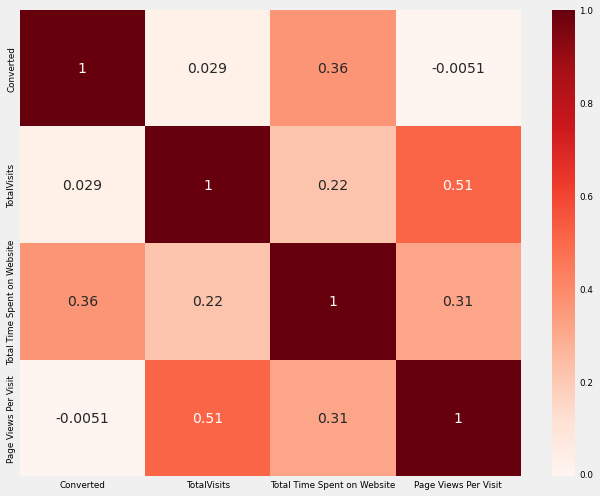

In [57]:
#Checking correlations of numeric values
plt.figure(figsize=(10,8))
sns.heatmap(leads.corr(), cmap="Reds", annot=True)
plt.show()

Insight:
- There doesn't seem to be any correlation between the numerical variables


### Data preparation

#### Outlier Handling

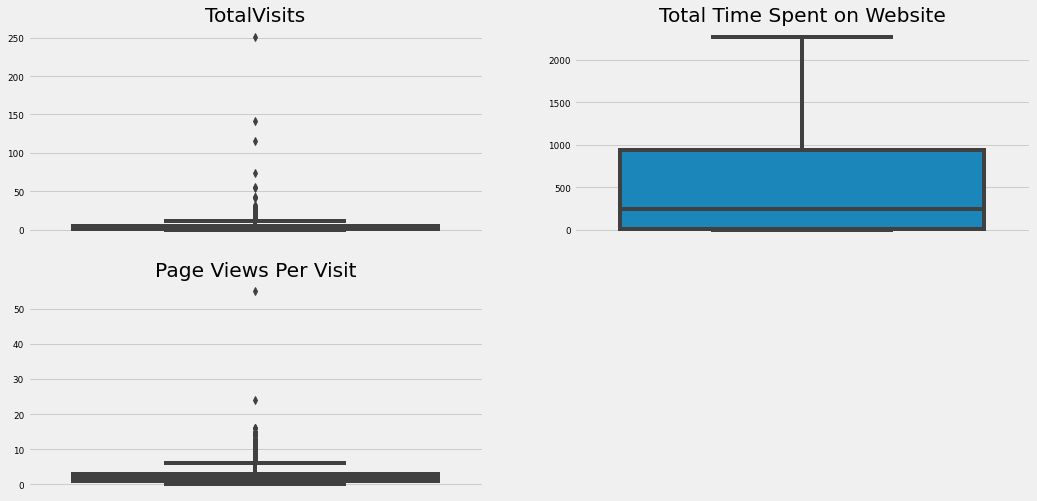

In [58]:
#Plotting the numerical columns for outlier values
i=1
plt.figure(figsize=[16,8])
for col in numerical:
    plt.subplot(2,2,i)
    sns.boxplot(y=leads[col])
    plt.title(col)
    plt.ylabel('')
    i+=1

- The outlier values is very high, and they can have a negative impact on the logistic regression model. Hence leads will be capped to their 95th percentile.
- Page Views Per Visit will be capped to their 95th percentile to not delete too many leads.

In [59]:
#Capping the data at 95% percetile value
Q4 = leads['TotalVisits'].quantile(0.95) 
print("Total number of rows getting capped for TotalVisits column : ",len(leads[leads['TotalVisits'] >= Q4]))
leads.loc[leads['TotalVisits'] >= Q4, 'TotalVisits'] = Q4 

Q4 = leads['Page Views Per Visit'].quantile(0.95) 
print("Total number of rows getting capped for Page Views Per Visit column : ",len(leads[leads['Page Views Per Visit'] >= Q4]))
leads.loc[leads['Page Views Per Visit'] >= Q4, 'Page Views Per Visit'] = Q4 

Total number of rows getting capped for TotalVisits column :  467
Total number of rows getting capped for Page Views Per Visit column :  604


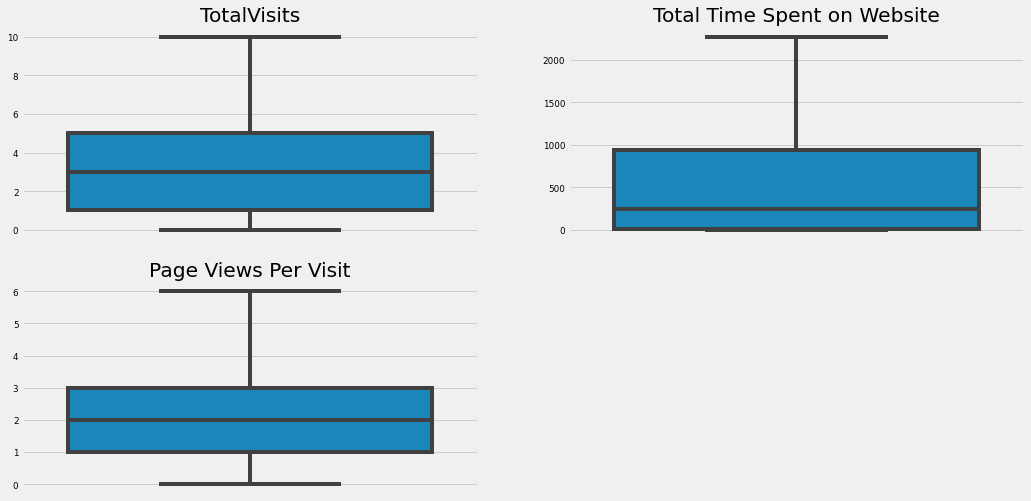

In [60]:
#Plotting the numerical columns for outlier values
i=1
plt.figure(figsize=[16,8])
for col in numerical:
    plt.subplot(2,2,i)
    sns.boxplot(y=leads[col])
    plt.title(col)
    plt.ylabel('')
    i+=1

Outliers have been handled

In [61]:
# Mapping categorial variable to binary, for better analysis ahead
leads['Do Not Email']=leads['Do Not Email'].map({'Yes': 1, "No": 0})

### Dummy Variables

In [62]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Occupation', 'Last Activity', 'Specialization']], drop_first=True)

# Adding the results to the master dataframe
leads = pd.concat([leads, dummy1], axis=1)

leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Occupation,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,...,0,0,0,0,1,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,...,0,0,0,0,1,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,...,0,0,0,0,1,0,0,0,0,0


In [63]:
# Created dummies for the below variables, so it should be dropped
leads = leads.drop(['Lead Origin', 'Lead Source', 'Occupation', 'Last Activity', 'Specialization'], axis=1)
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 62 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              9240 non-null   int64  
 1   Converted                                 9240 non-null   int64  
 2   TotalVisits                               9240 non-null   float64
 3   Total Time Spent on Website               9240 non-null   int64  
 4   Page Views Per Visit                      9240 non-null   float64
 5   Lead Origin_Landing Page Submission       9240 non-null   uint8  
 6   Lead Origin_Lead Add Form                 9240 non-null   uint8  
 7   Lead Origin_Lead Import                   9240 non-null   uint8  
 8   Lead Origin_Quick Add Form                9240 non-null   uint8  
 9   Lead Source_Direct Traffic                9240 non-null   uint8  
 10  Lead Source_Facebook                

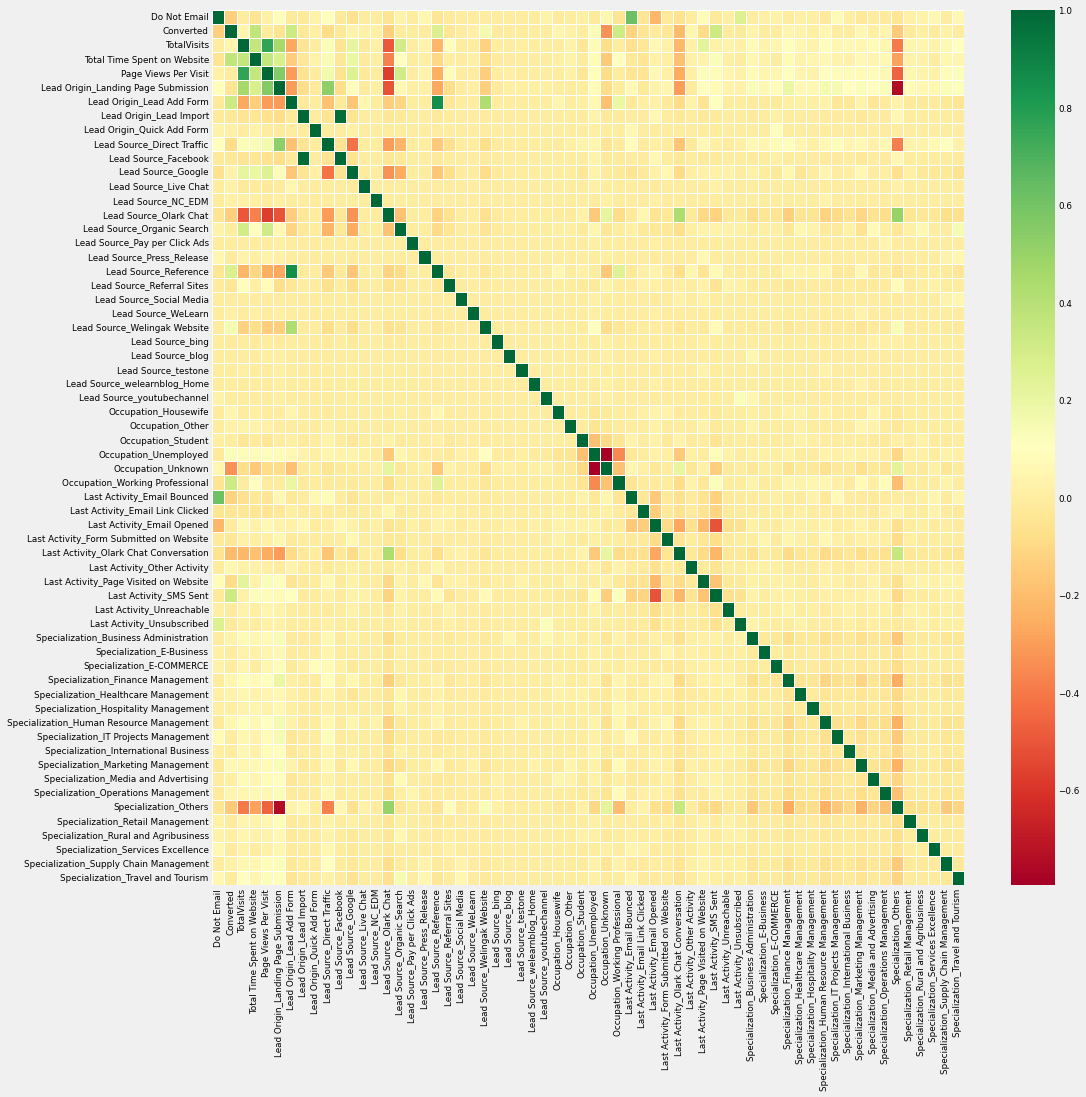

In [64]:
plt.figure(figsize=[15,15])
sns.heatmap(leads.corr(), cmap="RdYlGn",linewidth =1)
plt.show()

In [65]:
len(leads.columns)

62

After creating dummy variables there are 62 columns, hence this will be reduced to only view the top 5 positively and negatively correlated variables with respect to the target variable

In [66]:
corr_lead = leads.corr()
corr_lead = corr_lead.where(np.triu(np.ones(corr_lead.shape),k=1).astype(np.bool))
corr_df = corr_lead.unstack().reset_index()
corr_df.columns =['VAR1','VAR2','Correlation']
corr_df.dropna(subset = ["Correlation"], inplace = True) 
corr_df.sort_values(by='Correlation', ascending=False, inplace=True)

# Top 5 Positive correlated variables
corr_df.head(5)

,VAR1,VAR2,Correlation
627,Lead Source_Facebook,Lead Origin_Lead Import,0.981709
1122,Lead Source_Reference,Lead Origin_Lead Add Form,0.853237
250,Page Views Per Visit,TotalVisits,0.767585
2108,Last Activity_Email Bounced,Do Not Email,0.618470
314,Lead Origin_Landing Page Submission,Page Views Per Visit,0.553423


In [67]:
corr_df.sort_values(by='Correlation', ascending=True, inplace=True)

# Top 5 Negatively correlated variables
corr_df.head(5)

,VAR1,VAR2,Correlation
2015,Occupation_Unknown,Occupation_Unemployed,-0.794875
3477,Specialization_Others,Lead Origin_Landing Page Submission,-0.748263
872,Lead Source_Olark Chat,Page Views Per Visit,-0.573334
873,Lead Source_Olark Chat,Lead Origin_Landing Page Submission,-0.512950
2578,Last Activity_SMS Sent,Last Activity_Email Opened,-0.512325


#### Test-Train Split

In [68]:
# Target 
Y = leads['Converted']
X = leads.drop(['Converted'], axis=1)

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

In [69]:
# Checking the shape of the created Train & Test DFs
print(" Shape of X_train is : ",X_train.shape)
print(" Shape of y_train is : ",y_train.shape)
print(" Shape of X_test is  : ",X_test.shape)
print(" Shape of y_test is  : ",y_test.shape)



 Shape of X_train is :  (6468, 61)
 Shape of y_train is :  (6468,)
 Shape of X_test is  :  (2772, 61)
 Shape of y_test is  :  (2772,)


Scaling Features to standardized the values

In [70]:
scaler = StandardScaler()

X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']] = scaler.fit_transform(X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
1871,0,-1.149699,-0.885371,-1.266675,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6795,0,0.299722,0.005716,-0.516439,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3516,0,0.662077,-0.691418,0.143543,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8105,0,0.662077,1.365219,1.553761,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3934,0,-1.149699,-0.885371,-1.266675,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Model Building

In [71]:
# Using RFE to reduce the feature count from 61 to 20
logreg = LogisticRegression()
rfe = RFE(logreg, 20)           
rfe = rfe.fit(X_train, y_train)

In [72]:
# Checking the output of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 8),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 9),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 4),
 ('Lead Origin_Quick Add Form', False, 26),
 ('Lead Source_Direct Traffic', False, 3),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 7),
 ('Lead Source_Live Chat', False, 19),
 ('Lead Source_NC_EDM', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 5),
 ('Lead Source_Pay per Click Ads', False, 25),
 ('Lead Source_Press_Release', False, 20),
 ('Lead Source_Reference', False, 36),
 ('Lead Source_Referral Sites', False, 6),
 ('Lead Source_Social Media', False, 14),
 ('Lead Source_WeLearn', False, 16),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 28),
 ('Lead Source_blog', False, 27),
 ('Lead Source_testone', False, 42),
 ('Lead Source_welea

In [73]:
# Checking which columns remained after RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Facebook', 'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Occupation_Housewife',
       'Occupation_Unknown', 'Occupation_Working Professional',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other Activity', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'Specialization_Rural and Agribusiness'],
      dtype='object')

In [74]:
# Functions to repeat Logictis regression model and VIF calculation repeatedly

# function to build logistic regression model
def build_logistic_model(feature_list):
    X_train_local = X_train[feature_list] # get feature list for VIF
    X_train_sm = sm.add_constant(X_train_local) # required by statsmodels   
    log_model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit() # build model and learn coefficients  
    return(log_model, X_train_sm) # return the model and the X_train fitted with constant 

#function to calculate VIF
def calculate_VIF(X_train):  # Calculate VIF for features
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns # Read the feature names
    vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])] # calculate VIF
    vif['VIF'] = round(vif['VIF'],2)
    vif.sort_values(by='VIF', ascending = False, inplace=True)  
    return(vif) # returns the calculated VIFs for all the features

#### Manual Feature Reduction

In [75]:
# Model 1
features = list(rfe_col) #  Use RFE selected variables
log_model1, X_train_sm1 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2599.7
Date:                Thu, 19 Oct 2023   Deviance:                       5199.4
Time:                        17:21:52   Pearson chi2:                 8.08e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.7911      0.150     -5.263      0.000      -1.086      -0.497
Do Not Email                             -1.1769      0.182     -6.460      0.000      -1.534      -0.820
Total Time Spent on Website               1.0637      0.040     26.607      0.000       0.985       1.142
Lead Origin_Landing Page Submission      -1.0471      0.129     -8.089      0.000      -1.301      -0.793
Lead Origin_Lead Add Form                 2.7656      0.204     13.552      0.000       2.366       3.166
Lead Source_Facebook                     -0.6625      0.522     -1.268      0.205      -1.687       0.362
Lead Source_NC_EDM                       23.8813   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Olark Chat                    1.0797      0.124      8.720      0.000       0.837       1.322
Lead Source_Welingak Website              2.4810      0.750      3.309      0.001       1.011       3.951
Occupation_Housewife                     22.7695   1.35e+04      0.002      0.999   -2.65e+04    2.66e+04
Occupation_Unknown                       -1.0826      0.088    -12.341      0.000      -1.255      -0.911
Occupation_Working Professional           2.4082      0.190     12.678      0.000       2.036       2.780
Last Activity_Email Opened                0.7355      0.110      6.666      0.000       0.519       0.952
Last Activity_Olark Chat Conversation    -0.5988      0.192     -3.124      0.002      -0.974      -0.223
Last Activity_Other Activity              2.2562      0.488      4.622      0.000       1.299       3.213
Last Activity_SMS Sent                    1.8834      0.112     16.860      0.000       1.665       2.102
Last Activity_Unreachable                 0.8658      0.368      2.350      0.019       0.144       1.588
Last Activity_Unsubscribed                1.3788      0.484      2.850      0.004       0.431       2.327
Specialization_Hospitality Management    -0.9686      0.328     -2.950      0.003      -1.612      -0.325
Specialization_Others                    -0.9698      0.124     -7.825      0.000      -1.213      -0.727
Specialization_Rural and Agribusiness     0.5372      0.390      1.379      0.168      -0.227       1.301
=========================================================================================================
"""

In [76]:
#Checking VIF values
calculate_VIF(X_train)

,Features,VIF
30,Occupation_Unemployed,457.15
10,Lead Source_Google,249.91
31,Occupation_Unknown,221.85
8,Lead Source_Direct Traffic,212.68
13,Lead Source_Olark Chat,150.61
...,...,...
12,Lead Source_NC_EDM,1.12
15,Lead Source_Pay per Click Ads,1.12
20,Lead Source_WeLearn,1.12
7,Lead Origin_Quick Add Form,1.02


In [77]:
# Model 2
# Removing Lead Source_NC_EDM and Occupation_Housewife because of high p-value
features.remove('Occupation_Housewife') 
features.remove('Lead Source_NC_EDM') 
log_model2, X_train_sm2 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2607.8
Date:                Thu, 19 Oct 2023   Deviance:                       5215.6
Time:                        17:21:53   Pearson chi2:                 8.10e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.7834      0.150     -5.222      0.000      -1.077      -0.489
Do Not Email                             -1.1828      0.182     -6.495      0.000      -1.540      -0.826
Total Time Spent on Website               1.0628      0.040     26.621      0.000       0.985       1.141
Lead Origin_Landing Page Submission      -1.0411      0.129     -8.050      0.000      -1.295      -0.788
Lead Origin_Lead Add Form                 2.7834      0.204     13.653      0.000       2.384       3.183
Lead Source_Facebook                     -0.6640      0.522     -1.271      0.204      -1.688       0.360
Lead Source_Olark Chat                    1.0789      0.124      8.719      0.000       0.836       1.321
Lead Source_Welingak Website              2.4644      0.750      3.287      0.001       0.995       3.934
Occupation_Unknown                       -1.0816      0.088    -12.353      0.000      -1.253      -0.910
Occupation_Working Professional           2.3991      0.190     12.636      0.000       2.027       2.771
Last Activity_Email Opened                0.7357      0.110      6.692      0.000       0.520       0.951
Last Activity_Olark Chat Conversation    -0.6033      0.192     -3.150      0.002      -0.979      -0.228
Last Activity_Other Activity              2.2470      0.488      4.604      0.000       1.290       3.204
Last Activity_SMS Sent                    1.8734      0.111     16.819      0.000       1.655       2.092
Last Activity_Unreachable                 0.8548      0.368      2.320      0.020       0.133       1.577
Last Activity_Unsubscribed                1.3745      0.484      2.841      0.004       0.426       2.323
Specialization_Hospitality Management    -0.9772      0.328     -2.977      0.003      -1.621      -0.334
Specialization_Others                    -0.9745      0.124     -7.869      0.000      -1.217      -0.732
Specialization_Rural and Agribusiness     0.5275      0.389      1.354      0.176      -0.236       1.291
=========================================================================================================
"""

In [78]:
#Checking VIF Values
calculate_VIF(X_train[features])

,Features,VIF
2,Lead Origin_Landing Page Submission,2.99
16,Specialization_Others,2.78
9,Last Activity_Email Opened,2.57
12,Last Activity_SMS Sent,2.29
5,Lead Source_Olark Chat,2.20
10,Last Activity_Olark Chat Conversation,1.77
3,Lead Origin_Lead Add Form,1.64
7,Occupation_Unknown,1.61
0,Do Not Email,1.27
6,Lead Source_Welingak Website,1.27


In [79]:
# Model 3
# Removing Lead Source_NC_EDM and Occupation_Housewife because of high p-value (0.204)
features.remove('Lead Source_Facebook')  
log_model3, X_train_sm3 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2608.7
Date:                Thu, 19 Oct 2023   Deviance:                       5217.4
Time:                        17:21:54   Pearson chi2:                 8.11e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.7996      0.149     -5.351      0.000      -1.092      -0.507
Do Not Email                             -1.1830      0.182     -6.495      0.000      -1.540      -0.826
Total Time Spent on Website               1.0655      0.040     26.715      0.000       0.987       1.144
Lead Origin_Landing Page Submission      -1.0226      0.128     -7.968      0.000      -1.274      -0.771
Lead Origin_Lead Add Form                 2.8043      0.203     13.797      0.000       2.406       3.203
Lead Source_Olark Chat                    1.0978      0.123      8.926      0.000       0.857       1.339
Lead Source_Welingak Website              2.4624      0.750      3.284      0.001       0.993       3.932
Occupation_Unknown                       -1.0808      0.088    -12.341      0.000      -1.252      -0.909
Occupation_Working Professional           2.3977      0.190     12.633      0.000       2.026       2.770
Last Activity_Email Opened                0.7300      0.110      6.643      0.000       0.515       0.945
Last Activity_Olark Chat Conversation    -0.6028      0.192     -3.147      0.002      -0.978      -0.227
Last Activity_Other Activity              2.2481      0.488      4.604      0.000       1.291       3.205
Last Activity_SMS Sent                    1.8703      0.111     16.792      0.000       1.652       2.089
Last Activity_Unreachable                 0.8558      0.369      2.322      0.020       0.134       1.578
Last Activity_Unsubscribed                1.3743      0.484      2.840      0.005       0.426       2.323
Specialization_Hospitality Management    -0.9888      0.327     -3.020      0.003      -1.630      -0.347
Specialization_Others                    -0.9715      0.124     -7.861      0.000      -1.214      -0.729
Specialization_Rural and Agribusiness     0.5291      0.390      1.358      0.174      -0.234       1.293
=========================================================================================================
"""

In [80]:
#Checking VIF Values
calculate_VIF(X_train[features])

,Features,VIF
2,Lead Origin_Landing Page Submission,2.98
15,Specialization_Others,2.77
8,Last Activity_Email Opened,2.55
11,Last Activity_SMS Sent,2.28
4,Lead Source_Olark Chat,2.18
9,Last Activity_Olark Chat Conversation,1.77
3,Lead Origin_Lead Add Form,1.63
6,Occupation_Unknown,1.61
0,Do Not Email,1.27
5,Lead Source_Welingak Website,1.27


In [81]:
# Model 4
# Removing Lead Source_NC_EDM and Occupation_Housewife because of high p-value (0.174)
features.remove('Specialization_Rural and Agribusiness')
log_model4, X_train_sm4 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2609.6
Date:                Thu, 19 Oct 2023   Deviance:                       5219.2
Time:                        17:21:54   Pearson chi2:                 8.12e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.7911      0.149     -5.302      0.000      -1.084      -0.499
Do Not Email                             -1.1811      0.182     -6.492      0.000      -1.538      -0.824
Total Time Spent on Website               1.0651      0.040     26.711      0.000       0.987       1.143
Lead Origin_Landing Page Submission      -1.0227      0.128     -7.972      0.000      -1.274      -0.771
Lead Origin_Lead Add Form                 2.8029      0.203     13.794      0.000       2.405       3.201
Lead Source_Olark Chat                    1.0993      0.123      8.940      0.000       0.858       1.340
Lead Source_Welingak Website              2.4629      0.750      3.285      0.001       0.993       3.932
Occupation_Unknown                       -1.0818      0.088    -12.357      0.000      -1.253      -0.910
Occupation_Working Professional           2.3966      0.190     12.627      0.000       2.025       2.769
Last Activity_Email Opened                0.7288      0.110      6.636      0.000       0.514       0.944
Last Activity_Olark Chat Conversation    -0.6068      0.191     -3.169      0.002      -0.982      -0.231
Last Activity_Other Activity              2.2419      0.488      4.592      0.000       1.285       3.199
Last Activity_SMS Sent                    1.8672      0.111     16.782      0.000       1.649       2.085
Last Activity_Unreachable                 0.8487      0.368      2.303      0.021       0.126       1.571
Last Activity_Unsubscribed                1.3906      0.485      2.865      0.004       0.439       2.342
Specialization_Hospitality Management    -0.9951      0.327     -3.040      0.002      -1.637      -0.353
Specialization_Others                    -0.9785      0.123     -7.927      0.000      -1.220      -0.737
=========================================================================================================
"""

In [82]:
#Checking VIF Values
calculate_VIF(X_train[features])

,Features,VIF
2,Lead Origin_Landing Page Submission,2.97
15,Specialization_Others,2.77
8,Last Activity_Email Opened,2.55
11,Last Activity_SMS Sent,2.28
4,Lead Source_Olark Chat,2.18
9,Last Activity_Olark Chat Conversation,1.77
3,Lead Origin_Lead Add Form,1.63
6,Occupation_Unknown,1.61
0,Do Not Email,1.27
5,Lead Source_Welingak Website,1.27


##### After manually reducing the features untill the p-values are very low and the VIF is less than 3, We have a stable model, i.e Model 4. 

### Model Evalution 

In [83]:
# Create a matrix to Print the Accuracy, Sensitivity and Specificity
def lg_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    speci = TN/(TN+FP)
    sensi = TP/(TP+FN)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    FPR = FP/(TN + FP)
    FNR = FN/(TP + FN)
    pos_pred_val = TP /(TP+FP)
    neg_pred_val = TN /(TN+FN)
    
    print ("Model Accuracy value is              :", round(accuracy*100,2),"%")
    print ("Model Sensitivity value is           :", round(sensi*100,2),"%")
    print ("Model Specificity value is           :", round(speci*100,2),"%")
    print ("Model Precision value is             :", round(precision*100,2),"%")
    print ("Model Recall value is                :", round(recall*100,2),"%")
    print ("Model True Positive Rate (TPR)       :", round(TPR*100,2),"%")
    print ("Model False Positive Rate (FPR)      :", round(FPR*100,2),"%")
    print ("Model Poitive Prediction Value is    :", round(pos_pred_val*100,2),"%")
    print ("Model Negative Prediction value is   :", round(neg_pred_val*100,2),"%")

In [84]:
# Getting the predicted values on the train set
y_train_pred = log_model4.predict(X_train_sm4)
y_train_pred[:10]

1871    0.523486
6795    0.113305
3516    0.336733
8105    0.818686
3934    0.292254
4844    0.988274
3297    0.134427
8071    0.998294
987     0.099210
7423    0.900311
dtype: float64

In [85]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.52348619, 0.113305  , 0.33673309, 0.81868625, 0.292254  ,
       0.9882738 , 0.13442727, 0.99829399, 0.09920971, 0.90031134])

In [86]:
#Creating a dataframe with the actual Converted flag and the Predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted_IND':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect_IND'] = y_train.index
y_train_pred_final.head()

,Converted_IND,Converted_Prob,Prospect_IND
0,0,0.523486,1871
1,0,0.113305,6795
2,0,0.336733,3516
3,0,0.818686,8105
4,0,0.292254,3934


In [87]:
#Finding Optimal Cutoff Point
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted_IND,Converted_Prob,Prospect_IND,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.523486,1871,1,1,1,1,1,1,0,0,0,0
1,0,0.113305,6795,1,1,0,0,0,0,0,0,0,0
2,0,0.336733,3516,1,1,1,1,0,0,0,0,0,0
3,0,0.818686,8105,1,1,1,1,1,1,1,1,1,0
4,0,0.292254,3934,1,1,1,0,0,0,0,0,0,0


In [88]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','Precision','Recall'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted_IND'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    prec, rec, thresholds = precision_recall_curve(y_train_pred_final['Converted_IND'], y_train_pred_final[i])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci, prec[1], rec[1]]
cutoff_df

,prob,accuracy,sensi,speci,Precision,Recall
0.0,0.0,0.381262,1.000000,0.000000,1.000000,0.000000
0.1,0.1,0.632653,0.973236,0.422789,0.509554,0.973236
0.2,0.2,0.763760,0.916058,0.669915,0.631006,0.916058
0.3,0.3,0.800402,0.848743,0.770615,0.695118,0.848743
0.4,0.4,0.817718,0.775345,0.843828,0.753646,0.775345
0.5,0.5,0.818955,0.709246,0.886557,0.793917,0.709246
0.6,0.6,0.804267,0.613950,0.921539,0.828228,0.613950
0.7,0.7,0.785250,0.525142,0.945527,0.855915,0.525142
0.8,0.8,0.764069,0.431468,0.969015,0.895623,0.431468
0.9,0.9,0.713358,0.266423,0.988756,0.935897,0.266423


<Figure size 1296x576 with 0 Axes>

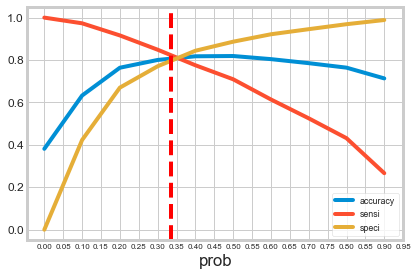

In [89]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(18,8))
sns.set_style("whitegrid")
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.335, color='r', linestyle='--') # additing axline
plt.yticks(size=12)
plt.show()

0.335 is the ideal cut-off points 

Optimal cutoff probability is that probability where we get a balance between sensitivity and specificity

In [90]:
y_train_pred_final['final_predicted_1'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.335 else 0)
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True) # deleting the unnecessary columns
y_train_pred_final.head()

,Converted_IND,Converted_Prob,Prospect_IND,final_predicted_1
0,0,0.523486,1871,1
1,0,0.113305,6795,0
2,0,0.336733,3516,1
3,0,0.818686,8105,1
4,0,0.292254,3934,0


In [91]:
# Let's assign Lead_score for the leads in Train Data Set
y_train_pred_final['lead_score_1']=(y_train_pred_final['Converted_Prob']*100).astype("int64")
y_train_pred_final.sort_values(by='Converted_Prob',ascending=False)

,Converted_IND,Converted_Prob,Prospect_IND,final_predicted_1,lead_score_1
3115,1,0.999473,2656,1,99
4891,1,0.999463,8074,1,99
1229,0,0.999170,8057,1,99
6312,1,0.999102,3428,1,99
6187,1,0.998930,7579,1,99
...,...,...,...,...,...
2016,0,0.004609,976,0,0
4946,0,0.004449,3300,0,0
3282,0,0.004097,5381,0,0
1457,0,0.003618,5279,0,0


#### Confusion Matrix

In [92]:
# Function for Confusion Matrix :
def draw_cm( actual, predicted, cmap ): 
    cm = metrics.confusion_matrix( actual, predicted, [0,1] ) 
    sns.heatmap(cm, annot=True, fmt='.0f', cmap=cmap,
    xticklabels = ["Not Converted", "Converted"] ,
    yticklabels = ["Not Converted", "Converted"] ) 
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels') 
    plt.show()

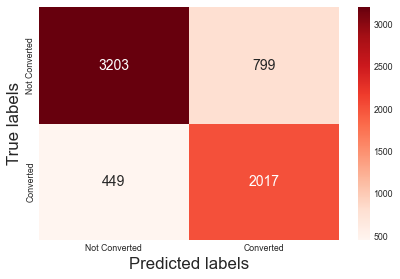

In [93]:
#Plotting the Confusion Matrix
draw_cm( y_train_pred_final['Converted_IND'], y_train_pred_final['final_predicted_1'], "Reds")

In [94]:
conf_matrix = confusion_matrix(y_train_pred_final['Converted_IND'], y_train_pred_final['final_predicted_1'] )

lg_metrics(conf_matrix)

Model Accuracy value is              : 80.71 %
Model Sensitivity value is           : 81.79 %
Model Specificity value is           : 80.03 %
Model Precision value is             : 71.63 %
Model Recall value is                : 81.79 %
Model True Positive Rate (TPR)       : 81.79 %
Model False Positive Rate (FPR)      : 19.97 %
Model Poitive Prediction Value is    : 71.63 %
Model Negative Prediction value is   : 87.71 %


In [95]:
# Classification Record : Precision, Recall and F1 Score
print( metrics.classification_report( y_train_pred_final['Converted_IND'], y_train_pred_final['final_predicted_1'] ) )

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      4002
           1       0.72      0.82      0.76      2466

    accuracy                           0.81      6468
   macro avg       0.80      0.81      0.80      6468
weighted avg       0.82      0.81      0.81      6468



In [96]:
print("F1 Score: {}".format(f1_score(y_train_pred_final['Converted_IND'], y_train_pred_final['final_predicted_1'])))

F1 Score: 0.7637258614161304


- Model Accuracy value is              :  80.71 %
- Model Sensitivity value is           :  81.79 %
- From the above it can be said that more than 80% of the leads will be correctly identified.

#### ROC Curve

In [97]:
# Function to plot ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [98]:
# recoring the values FPR, TPR and Thresholds:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Converted_IND'], y_train_pred_final['Converted_Prob'] , drop_intermediate = False )

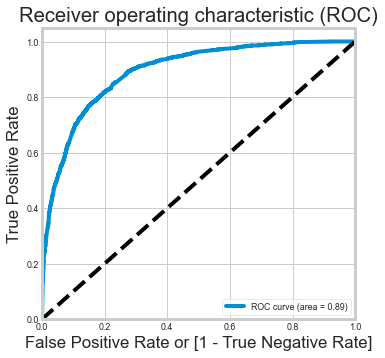

In [99]:
#plotting the ROC curve 
draw_roc(y_train_pred_final['Converted_IND'], y_train_pred_final['Converted_Prob'])

The area under the ROC Curve is 0.89, which indicates that the model is good. 

Precision - Recall Trade off 

In [100]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted_IND'], y_train_pred_final['Converted_Prob'])

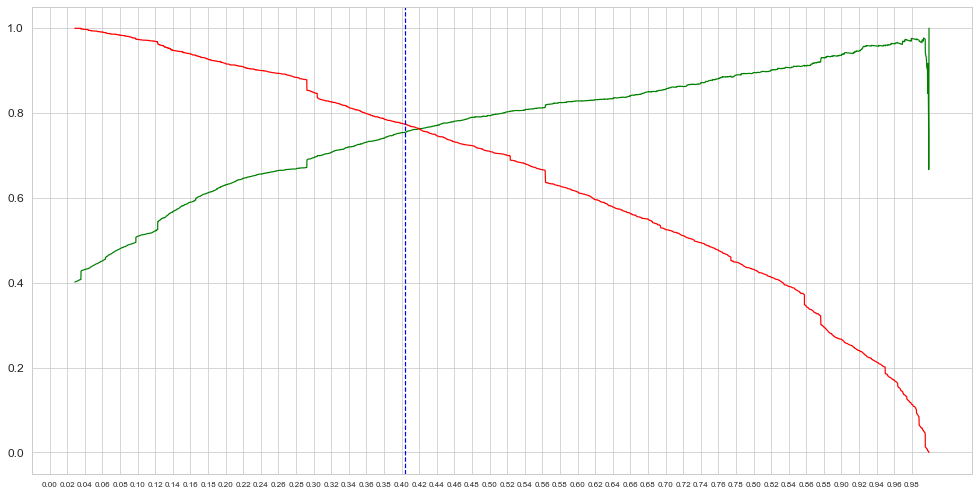

In [101]:
# Plotting the Precision-Recall Trade off Curve for the test set
plt.figure(figsize=(15,8))
sns.set_style("whitegrid")
sns.set_context("paper")
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.404, color='b', linestyle='--') # additing axline
plt.xticks(np.arange(0,1,step=0.02),size=8)
plt.yticks(size=12)

plt.show()

The cutoff point seems to 0.405.

In [102]:
# plotting the Train dataset again with 0.405 as cutoff
y_train_pred_final['final_predicted_2'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.405 else 0)
y_train_pred_final.head()

,Converted_IND,Converted_Prob,Prospect_IND,final_predicted_1,lead_score_1,final_predicted_2
0,0,0.523486,1871,1,52,1
1,0,0.113305,6795,0,11,0
2,0,0.336733,3516,1,33,0
3,0,0.818686,8105,1,81,1
4,0,0.292254,3934,0,29,0


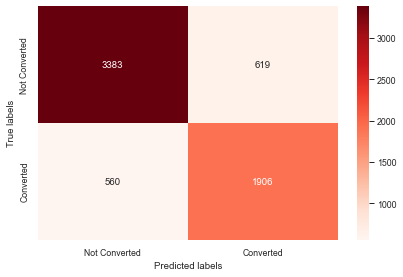

In [103]:
#Plotting the Confusion Matrix
draw_cm( y_train_pred_final['Converted_IND'], y_train_pred_final['final_predicted_2'], "Reds")

In [104]:
#Data based on cutoff received from Precision-Recall Trade off
conf_matrix = confusion_matrix(y_train_pred_final['Converted_IND'], y_train_pred_final['final_predicted_2'] )
lg_metrics(conf_matrix)

Model Accuracy value is              : 81.77 %
Model Sensitivity value is           : 77.29 %
Model Specificity value is           : 84.53 %
Model Precision value is             : 75.49 %
Model Recall value is                : 77.29 %
Model True Positive Rate (TPR)       : 77.29 %
Model False Positive Rate (FPR)      : 15.47 %
Model Poitive Prediction Value is    : 75.49 %
Model Negative Prediction value is   : 85.8 %


In [105]:
# Classification Record : Precision, Recall and F1 Score
print( metrics.classification_report( y_train_pred_final['Converted_IND'], y_train_pred_final['final_predicted_2'] ) )

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      4002
           1       0.75      0.77      0.76      2466

    accuracy                           0.82      6468
   macro avg       0.81      0.81      0.81      6468
weighted avg       0.82      0.82      0.82      6468



Insight:
- The Sensitivity value is lower at this cutoff point (0.405), hence 0.335 will be used

In [106]:
# Scaling the test dataset :
X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']] = scaler.transform(X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4269,0,1.749143,0.964504,2.117849,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2376,0,-1.149699,-0.885371,-1.266675,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7766,0,0.662077,-0.777416,1.553761,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9199,0,-1.149699,-0.885371,-1.266675,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4359,0,-1.149699,-0.885371,-1.266675,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [107]:
# Selecting only the columns used in final model of Train Dataset
X_test = X_test[features]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Occupation_Unknown,Occupation_Working Professional,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Hospitality Management,Specialization_Others
4269,0,0.964504,0,0,0,0,1,0,0,0,0,1,0,0,0,1
2376,0,-0.885371,0,1,0,0,0,0,0,0,0,1,0,0,0,1
7766,0,-0.777416,0,0,0,0,0,1,0,0,0,0,1,0,0,0
9199,0,-0.885371,0,0,1,0,0,0,0,1,0,0,0,0,0,1
4359,0,-0.885371,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [108]:
#adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.columns

Index(['const', 'Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Occupation_Unknown', 'Occupation_Working Professional',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other Activity', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Hospitality Management', 'Specialization_Others'],
      dtype='object')

In [109]:
# Predicting the final test model 
y_test_pred = log_model4.predict(X_test_sm)

In [110]:
#checking the top 10 rows
y_test_pred[:10]

4269    0.510782
2376    0.876272
7766    0.835646
9199    0.097968
4359    0.857860
9186    0.575200
1631    0.486538
8963    0.188242
8007    0.040380
5324    0.359446
dtype: float64

In [111]:
# Converting y_pred to a dataframe which is an array
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
4269,0.510782
2376,0.876272
7766,0.835646
9199,0.097968
4359,0.857860


In [112]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [113]:
y_test_df['Prospect_IND'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

,Converted,Prospect_IND,0
0,1,4269,0.510782
1,1,2376,0.876272
2,1,7766,0.835646
3,0,9199,0.097968
4,1,4359,0.857860


In [114]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final= y_pred_final.rename(columns={ 'Converted' : 'Converted_IND'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect_IND','Converted_IND','Converted_Prob'], axis=1)
y_pred_final.head()

,Prospect_IND,Converted_IND,Converted_Prob
0,4269,1,0.510782
1,2376,1,0.876272
2,7766,1,0.835646
3,9199,0,0.097968
4,4359,1,0.857860


In [115]:
# Using cutoff point
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.335 else 0)
y_pred_final.head()

,Prospect_IND,Converted_IND,Converted_Prob,final_predicted
0,4269,1,0.510782,1
1,2376,1,0.876272,1
2,7766,1,0.835646,1
3,9199,0,0.097968,0
4,4359,1,0.857860,1


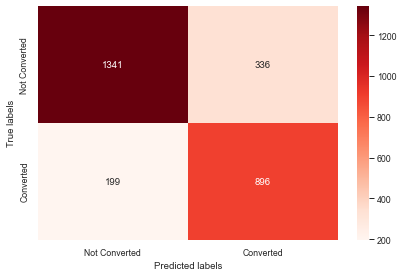

In [116]:
#Plotting the Confusion Matrix
draw_cm( y_pred_final['Converted_IND'], y_pred_final['final_predicted'], "Reds")

In [117]:
conf_matrix = confusion_matrix(y_pred_final['Converted_IND'], y_pred_final['final_predicted'])

lg_metrics(conf_matrix)

Model Accuracy value is              : 80.7 %
Model Sensitivity value is           : 81.83 %
Model Specificity value is           : 79.96 %
Model Precision value is             : 72.73 %
Model Recall value is                : 81.83 %
Model True Positive Rate (TPR)       : 81.83 %
Model False Positive Rate (FPR)      : 20.04 %
Model Poitive Prediction Value is    : 72.73 %
Model Negative Prediction value is   : 87.08 %


Insights:
- Model Accuracy value is              :  80.7%
- Model Sensitivity value is           :  81.83%
- For the train data sensitivity was 81.79%, and for the test it is 81.83%. Hence, it can be said that then model is working well on the test data.

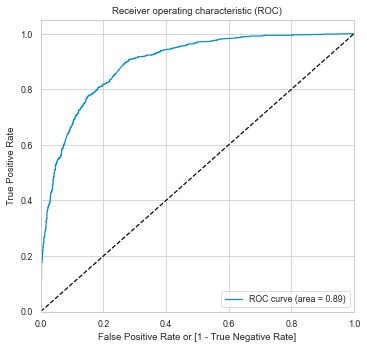

In [118]:
# Invoking the functio to draw ROC curve

draw_roc( y_pred_final['Converted_IND'], y_pred_final['Converted_Prob'])

The area under the ROC Curve is 0.89, which indicates that the model is good. 

In [119]:
# Classification Record : Precision, Recall and F1 Score
print( metrics.classification_report( y_pred_final['Converted_IND'], y_pred_final['final_predicted'] ) )

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1677
           1       0.73      0.82      0.77      1095

    accuracy                           0.81      2772
   macro avg       0.80      0.81      0.80      2772
weighted avg       0.81      0.81      0.81      2772



In [120]:
# Assigning a lead_score for the leads in Test Data Set : 
y_pred_final['lead_score']=(y_pred_final['Converted_Prob']*100).astype("int64")
y_pred_final.sort_values(by='Converted_Prob',ascending=False)

,Prospect_IND,Converted_IND,Converted_Prob,final_predicted,lead_score
546,3478,1,0.999437,1,99
2405,5921,1,0.998986,1,99
1026,5671,1,0.998734,1,99
745,6383,1,0.998423,1,99
2589,7327,1,0.997860,1,99
...,...,...,...,...,...
17,3545,0,0.006371,0,0
2034,2454,0,0.003632,0,0
2521,8733,0,0.003427,0,0
597,3682,0,0.002866,0,0


Lead score can be used to decide which customer to prioritize first, the higher the lead score, the higher the chances of them getting converted.

<Figure size 864x576 with 0 Axes>

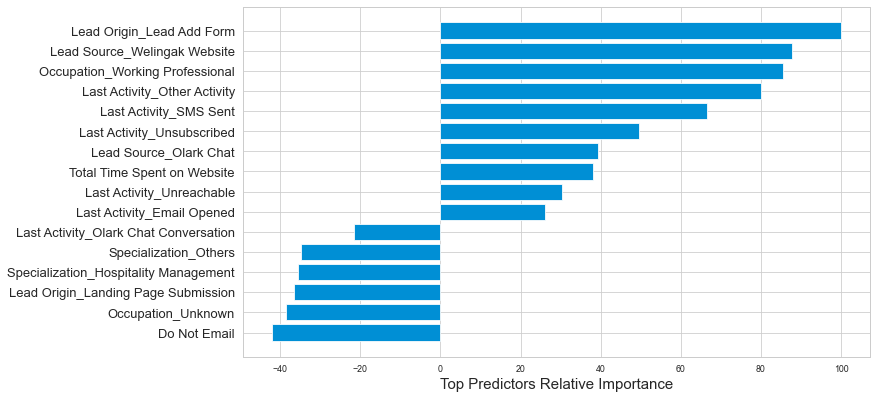

In [128]:
# Code to display the top predictor variables
pd.options.display.float_format = '{:.2f}'.format
final_parameters = log_model4.params[1:]
final_parameters[final_parameters>0.0]
top_predictors = final_parameters
top_predictors = 100.0 * (top_predictors / top_predictors.max())
top_predictors
top_predictors_sort = np.argsort(top_predictors,kind='quicksort',order='list of str')
fig = plt.figure(figsize = (12,8))
pos = np.arange(top_predictors_sort.shape[0]) + .5

fig1 = plt.figure(figsize=(10,6))
ax = fig1.add_subplot(1, 1, 1)
ax.barh(pos, top_predictors[top_predictors_sort])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[features].columns)[top_predictors_sort], fontsize=13)
ax.set_xlabel('Top Predictors Relative Importance', fontsize=15)
plt.show()

Top 3 predictor dummy variables
- Lead Origin_Lead Add Form
- Lead Source_Welingak Website
- Occupation_Working Professional